In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

In [14]:
predict = pd.read_csv('predict/loss_1/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'])

In [15]:
predict

,kb_desc,oie_rel,dist,label
0,sport in which the subject participates or bel...,are,1.380619,0.0
1,sport in which the subject participates or bel...,are,1.380619,0.0
2,sport in which the subject participates or bel...,are,1.380619,0.0
3,sport in which the subject participates or bel...,are,1.380619,0.0
4,sport in which the subject participates or bel...,are,1.380619,0.0
5,sport in which the subject participates or bel...,are,1.380619,0.0
6,sport in which the subject participates or bel...,are,1.380619,1.0
7,sport in which the subject participates or bel...,are,1.380619,0.0
8,sport in which the subject participates or bel...,are,1.380619,0.0
9,sport in which the subject participates or bel...,are,1.380619,0.0


In [16]:
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
precision, recall, thresholds = precision_recall_curve(label, label_scores)

In [17]:
precision, recall, thresholds

(array([0.8926332 , 0.89262753, 0.89263583, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99940772e-01, 9.99928926e-01, ...,
        2.36913491e-05, 1.18456746e-05, 0.00000000e+00]),
 array([0.05018596, 0.06733742, 0.08600463, ..., 3.17030025, 3.17061734,
        4.13140821]))

<Figure size 432x288 with 0 Axes>

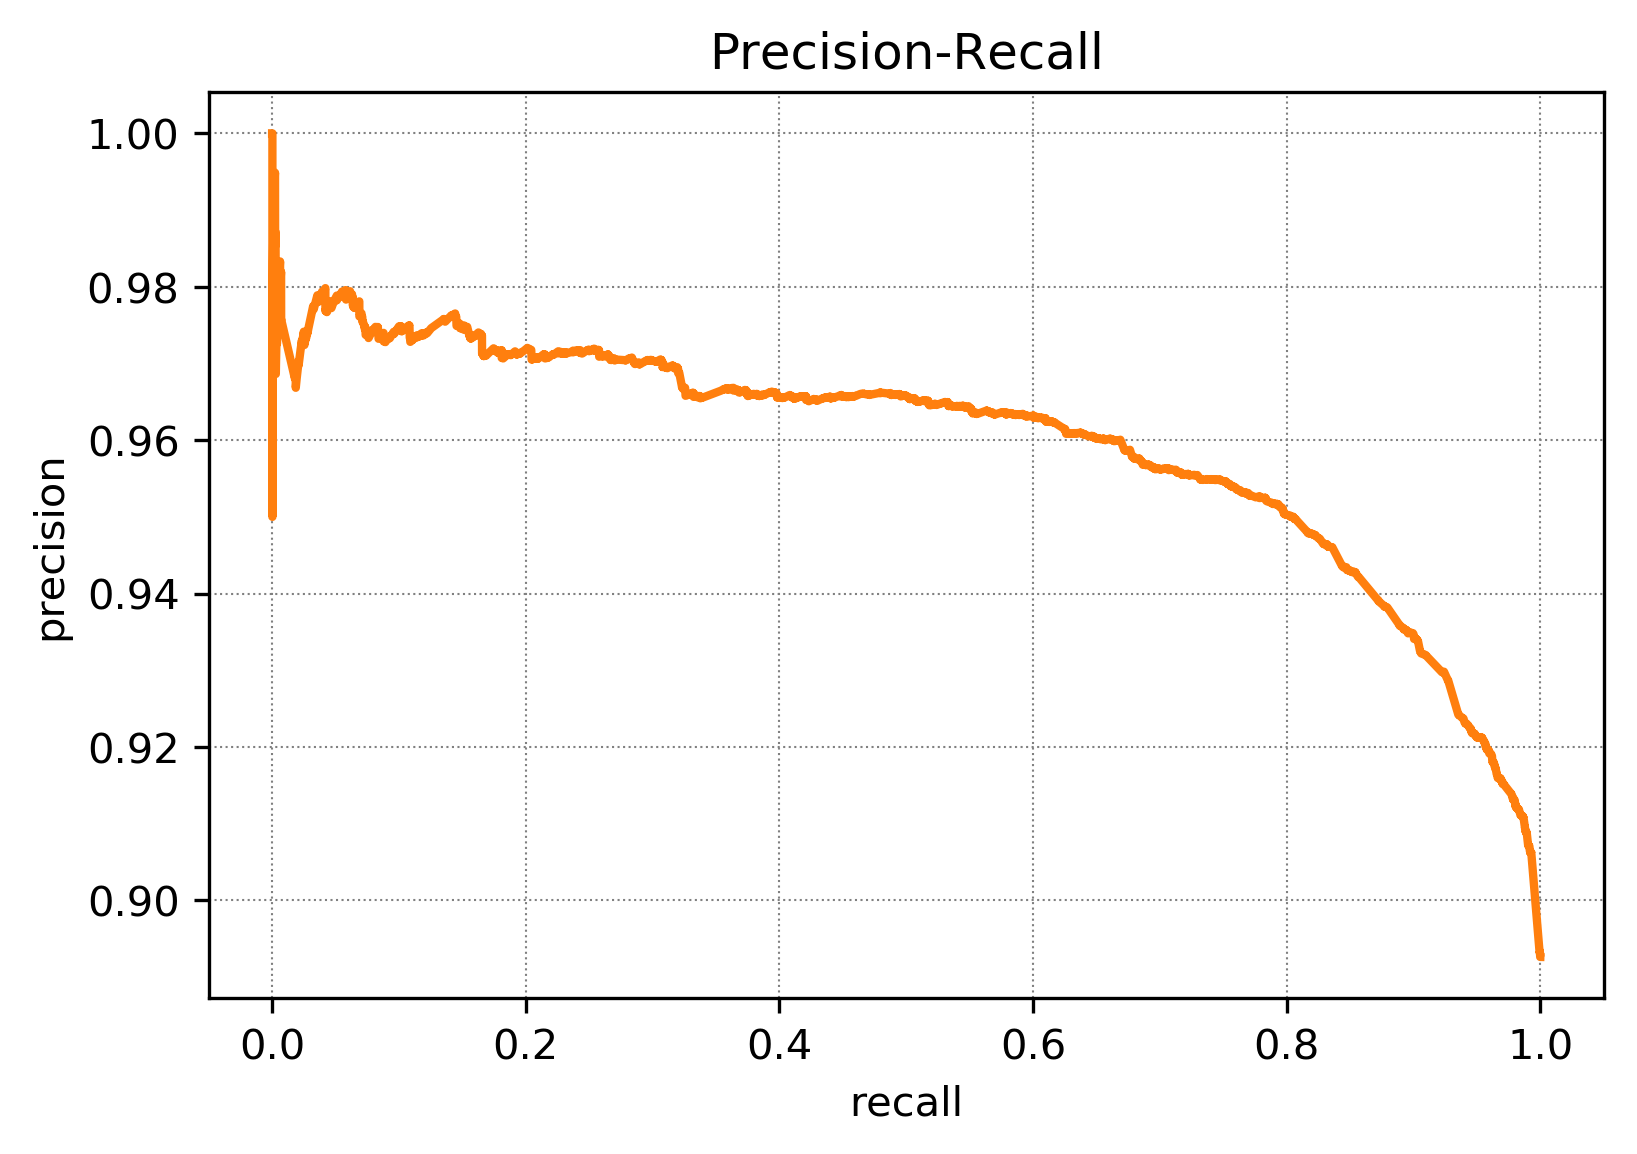

In [18]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall, precision, lw=2, color='C1', ls='-', label='Original Data')

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.show()

In [19]:
average_precision_score(label, label_scores) 

0.959286319650708

### Visualize Embedding

In [20]:
rel_vector = pd.read_csv('predict/loss_1/rel_embed_vector.tsv', sep='\t', header=None, names=['el1', 'el2'])
rel_label = pd.read_csv('predict/loss_1/rel_embed_label.tsv', sep='\t', header=None, names=['label'])

In [21]:
rel_label = rel_label.drop_duplicates()

In [22]:
rel_label.to_csv('predict/loss_1/unique_rel_list.tsv', sep='\t')

In [23]:
vector_x = []
vector_y = []
label = []
observed_label = ['are', 'is', 'were', 'was', 'has', 'to', 'been', 'used', 'uses', 'may', 'had', 'be', 'can',
                  '\'s Magazine is', 'along with Canadians is']
for index, row in rel_label.iterrows():
    vector_x.append(rel_vector['el1'][index])
    vector_y.append(rel_vector['el2'][index])
    label_txt = rel_label['label'][index]
    if label_txt in observed_label:
        label.append(label_txt)
    else:
        label.append('')

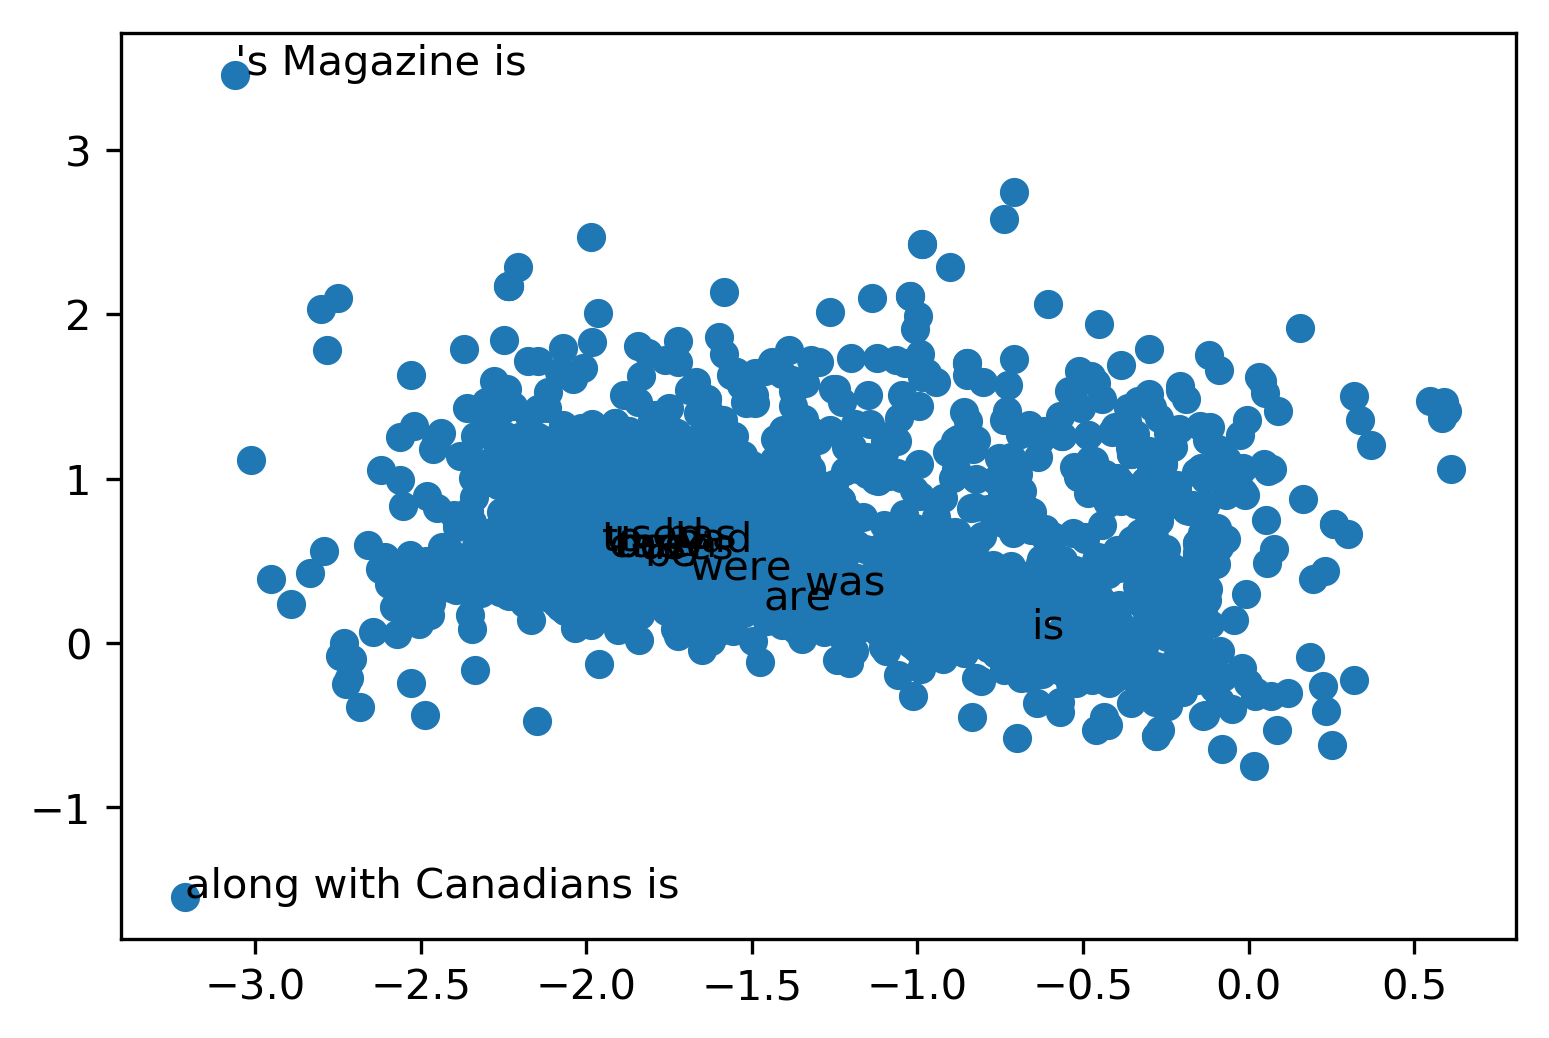

In [24]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(vector_x, vector_y)

for i, txt in enumerate(label):
    ax.annotate(txt, (vector_x[i], vector_y[i]))

In [27]:
' Georgia ' in 'Georgian'

False